### **Fake News Detection using NLP**

In this project, we will build a fake news detection model using Natural Language Processing (NLP) techniques. We have a dataset consisting of genuine and fake articles' titles and text, and our goal is to distinguish between them.



Step 1: Import Necessary Libraries


We begin by importing the necessary libraries for our Fake News Detection project. These include:
- **Pandas & NumPy** for handling datasets and numerical computations.
- **Scikit-learn** for machine learning models and text processing.
- **Matplotlib & Seaborn** for data visualization.
- **NLTK** for natural language processing, including stopword removal.

Additionally, we download the required NLTK resources:
- **Punkt Tokenizer**: Used for tokenizing sentences.
- **Stopwords List**: A collection of commonly used words (like "the", "and", "is") that do not contribute much to the meaning of a sentence.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Step 2: Load and Explore the Dataset

In [ ]:
# Load the dataset
true_df = pd.read_csv('/content/True.csv')
false_df = pd.read_csv('/content/Fake.csv')

# Add labels to indicate real and fake news
true_df['label'] = 1
false_df['label'] = 0

# Concatenate both datasets
data = pd.concat([true_df, false_df])

In [ ]:
#True dataset
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
#Fake dataset
false_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Step 3: Data Preprocessing

Text Preprocessing: Lowercasing, Tokenization, and Stopword Removal
- Lowercasing
- Tokenization
- Stopword Removal



In [ ]:
# Lowercasing and tokenization
data['text'] = data['text'].str.lower()
data['title'] = data['title'].str.lower()
data['text'] = data['text'].apply(nltk.word_tokenize)
data['title'] = data['title'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
data['title'] = data['title'].apply(lambda x: [word for word in x if word not in stop_words])

Step 4: Feature Extraction (TF-IDF)

Feature Extraction:
TF-IDF Vectorization
We convert textual data into numerical representations using TF-IDF (Term Frequency-Inverse Document Frequency):
- **TF-IDF captures word importance** based on frequency and uniqueness across documents.
- We limit the vocabulary to the **top 5,000 words** for efficiency.
- **`fit_transform()`** is applied to the `text` column to train the vectorizer.
- **`transform()`** is applied to the `title` column using the same learned vocabulary.

This step prepares the data for model training by converting text into a machine-readable format.


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
text_tfidf = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))
title_tfidf = tfidf_vectorizer.transform(data['title'].apply(lambda x: ' '.join(x)))

Step 5: Split the Data into Training and Testing Sets

Splitting the Dataset into Training and Testing Sets
We divide the dataset into:
- **80% training data** to train the model.
- **20% testing data** to evaluate model performance.

Feature (`X`) and Target (`y`):
- `X`: TF-IDF transformed text data.
- `y`: Labels (1 for real news, 0 for fake news).

Using `train_test_split()` ensures a random and unbiased split, with `random_state=42` for reproducibility.


In [ ]:
X = text_tfidf
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (35918, 5000)
X_test shape: (8980, 5000)
y_train shape: (35918,)
y_test shape: (8980,)


Step 6: Model Training


Training and Evaluating the Naïve Bayes Model

We use **Multinomial Naïve Bayes (MultinomialNB)**, which is well-suited for text classification problems.

Model Training:
- The model is trained on the TF-IDF-transformed training data.

Predictions & Evaluation:
- **Accuracy Score**: Measures overall performance.
- **Confusion Matrix**: Displays correct and incorrect predictions.
- **Classification Report**: Shows precision, recall, and F1-score.

Visualization:
- A heatmap is used to display the confusion matrix for better interpretability.


Accuracy: 0.94


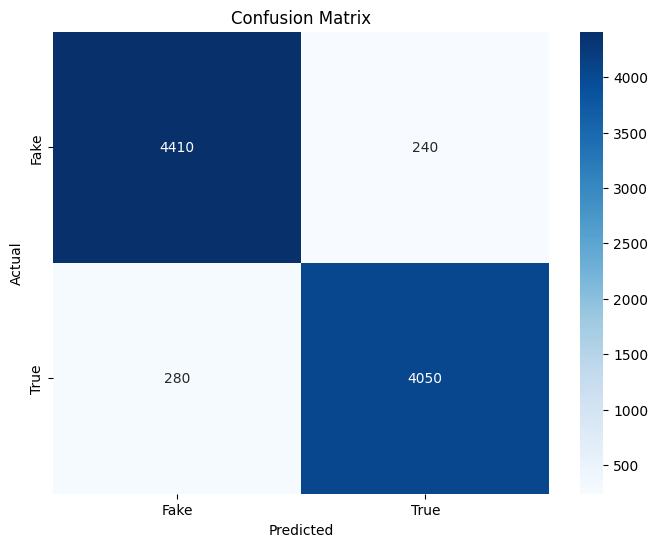

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4650
           1       0.94      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:
# Initialize and train the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Format and display the metrics
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_rep)

Training and Evaluating the Decision Tree Classifier

We implement a **Decision Tree Classifier** as an alternative to Naïve Bayes for Fake News Detection.

Model Training:
- The Decision Tree model learns patterns from the TF-IDF-transformed training data.

Model Evaluation:
- We define a function `evaluate_decision_tree()` to:
  - **Predict labels** for test data.
  - **Compute accuracy** to measure overall performance.
  - **Generate a confusion matrix** to analyze correct and incorrect classifications.
  - **Display the classification report** with precision, recall, and F1-score.

By comparing Decision Tree performance with Naïve Bayes, we can determine the best approach for Fake News Detection.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Evaluate the Decision Tree model
def evaluate_decision_tree(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Decision Tree
dt_accuracy, dt_confusion, dt_classification = evaluate_decision_tree(decision_tree, X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion)
print("Decision Tree Classification Report:\n", dt_classification)

Decision Tree Accuracy: 0.9967706013363029
Decision Tree Confusion Matrix:
 [[4638   12]
 [  17 4313]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Training and Evaluating the Passive Aggressive Classifier

The **Passive Aggressive Classifier** is an online learning algorithm that updates its model dynamically.

Model Training:
- It is designed for **real-time classification** and works well for text-based tasks.

Model Evaluation:
- We define a function `evaluate_passive_aggressive()` to:
  - **Predict labels** for test data.
  - **Compute accuracy** to measure overall performance.
  - **Generate a confusion matrix** to analyze correct and incorrect classifications.
  - **Display the classification report** with precision, recall, and F1-score.

By comparing this model's performance with Naïve Bayes and Decision Tree, we can determine the best approach for Fake News Detection.


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Define and train the Passive Aggressive Classifier model
passive_aggressive = PassiveAggressiveClassifier()
passive_aggressive.fit(X_train, y_train)

# Evaluate the Passive Aggressive Classifier model
def evaluate_passive_aggressive(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Passive Aggressive Classifier
pa_accuracy, pa_confusion, pa_classification = evaluate_passive_aggressive(passive_aggressive, X_test, y_test)
print("Passive Aggressive Classifier Accuracy:", pa_accuracy)
print("Passive Aggressive Classifier Confusion Matrix:\n", pa_confusion)
print("Passive Aggressive Classifier Classification Report:\n", pa_classification)

Passive Aggressive Classifier Accuracy: 0.9968819599109131
Passive Aggressive Classifier Confusion Matrix:
 [[4634   16]
 [  12 4318]]
Passive Aggressive Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Training and Evaluating the Random Forest Classifier

The **Random Forest Classifier** is an ensemble learning method that combines multiple decision trees to improve accuracy.

Model Training:
- **100 decision trees** (`n_estimators=100`) are used to make predictions.
- The model aggregates votes from multiple trees to enhance robustness.

Model Evaluation:
- We define a function `evaluate_random_forest()` to:
  - **Predict labels** for test data.
  - **Compute accuracy** to measure overall performance.
  - **Generate a confusion matrix** to analyze correct and incorrect classifications.
  - **Display the classification report** with precision, recall, and F1-score.

By comparing this model's performance with **Naïve Bayes, Decision Tree, and Passive Aggressive Classifier**, we can determine the most effective approach for **Fake News Detection**.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Evaluate the Random Forest model
def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Random Forest
rf_accuracy, rf_confusion, rf_classification = evaluate_random_forest(random_forest, X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion)
print("Random Forest Classification Report:\n", rf_classification)

Random Forest Accuracy: 0.9986636971046771
Random Forest Confusion Matrix:
 [[4644    6]
 [   6 4324]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Training and Evaluating the Logistic Regression Model

The **Logistic Regression Classifier** is a simple yet effective model for binary classification.

Model Training:
- The model is trained using TF-IDF-transformed data.
- Logistic Regression is a **linear model** that predicts probabilities for two classes.

Model Evaluation:
- We define a function `evaluate_logistic_regression()` to:
  - **Predict labels** for test data.
  - **Compute accuracy** to measure overall performance.
  - **Generate a confusion matrix** to analyze correct and incorrect classifications.
  - **Display the classification report** with precision, recall, and F1-score.

By comparing this model's performance with **Naïve Bayes, Decision Tree, Random Forest, and Passive Aggressive Classifier**, we can determine the most effective approach for **Fake News Detection**.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Evaluate the Logistic Regression model
def evaluate_logistic_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Logistic Regression
lr_accuracy, lr_confusion, lr_classification = evaluate_logistic_regression(logistic_regression, X_test, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion)
print("Logistic Regression Classification Report:\n", lr_classification)

Logistic Regression Accuracy: 0.9918708240534521
Logistic Regression Confusion Matrix:
 [[4601   49]
 [  24 4306]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Step 7: Model Validation and Evaluation

Evaluating Logistic Regression Model with Precision, Recall, and F1-Score

To get a deeper insight into the model's performance, we calculate:

- **Precision**: Measures how many predicted "True" labels are actually correct.
- **Recall**: Measures how many actual "True" labels were correctly identified.
- **F1-Score**: Harmonic mean of precision and recall, balancing both metrics.

We repeat this evaluation for **Random Forest, Passive Aggressive, and Decision Tree models** to compare their effectiveness in detecting Fake News.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing and evaluating Logistic Regression
lr_test_predictions = logistic_regression.predict(X_test)
lr_test_precision = precision_score(y_test, lr_test_predictions)
lr_test_recall = recall_score(y_test, lr_test_predictions)
lr_test_f1 = f1_score(y_test, lr_test_predictions)

# Print precision, recall, and F1 score for Logistic Regression
print("Logistic Regression Test Precision:", lr_test_precision)
print("Logistic Regression Test Recall:", lr_test_recall)
print("Logistic Regression Test F1 Score:", lr_test_f1)

# Repeat the testing and evaluation for the other classifiers (Random Forest, Passive Aggressive, Decision Tree)

Logistic Regression Test Precision: 0.9887485648679678
Logistic Regression Test Recall: 0.9944572748267898
Logistic Regression Test F1 Score: 0.991594703511802


Evaluating Random Forest Model with Precision, Recall, and F1-Score

To further analyze the model’s performance, we compute:

- **Precision**: The proportion of correctly predicted "True" labels out of all predicted "True" labels.
- **Recall**: The proportion of actual "True" labels that were correctly identified.
- **F1-Score**: A balanced measure that combines precision and recall.

These metrics help us determine how well the **Random Forest Classifier** performs in detecting Fake News. We can compare these values with other models like **Logistic Regression, Naïve Bayes, Decision Tree, and Passive Aggressive Classifier**.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Random Forest model on the test data
rf_test_predictions = random_forest.predict(X_test)

# Evaluate Random Forest on the test data
rf_test_precision = precision_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

# Print precision, recall, and F1 score for Random Forest
print("Random Forest Test Precision:", rf_test_precision)
print("Random Forest Test Recall:", rf_test_recall)
print("Random Forest Test F1 Score:", rf_test_f1)

Random Forest Test Precision: 0.9986143187066975
Random Forest Test Recall: 0.9986143187066975
Random Forest Test F1 Score: 0.9986143187066975


Evaluating Passive Aggressive Classifier with Precision, Recall, and F1-Score

To assess the model’s effectiveness in Fake News Detection, we compute:

- **Precision**: The proportion of correctly predicted "True" labels out of all predicted "True" labels.
- **Recall**: The proportion of actual "True" labels that were correctly classified.
- **F1-Score**: A harmonic mean of precision and recall, providing a balanced performance measure.

Since the **Passive Aggressive Classifier** is designed for online learning and is effective in text classification tasks, comparing these metrics with other models (Logistic Regression, Naïve Bayes, Random Forest, and Decision Tree) helps us understand its effectiveness.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Passive Aggressive Classifier model on the test data
pa_test_predictions = passive_aggressive.predict(X_test)

# Evaluate Passive Aggressive Classifier on the test data
pa_test_precision = precision_score(y_test, pa_test_predictions)
pa_test_recall = recall_score(y_test, pa_test_predictions)
pa_test_f1 = f1_score(y_test, pa_test_predictions)

# Print precision, recall, and F1 score for Passive Aggressive Classifier
print("Passive Aggressive Classifier Test Precision:", pa_test_precision)
print("Passive Aggressive Classifier Test Recall:", pa_test_recall)
print("Passive Aggressive Classifier Test F1 Score:", pa_test_f1)

Passive Aggressive Classifier Test Precision: 0.9963082602676512
Passive Aggressive Classifier Test Recall: 0.997228637413395
Passive Aggressive Classifier Test F1 Score: 0.9967682363804248


Evaluating Decision Tree Model with Precision, Recall, and F1-Score

To assess the performance of the **Decision Tree Classifier**, we compute:

- **Precision**: Measures how many predicted "True" labels are actually correct.
- **Recall**: Measures how many actual "True" labels were correctly classified.
- **F1-Score**: A balanced metric that combines precision and recall.

While Decision Trees are interpretable and easy to understand, they may be prone to overfitting. Comparing these metrics with other models like **Logistic Regression, Naïve Bayes, Passive Aggressive, and Random Forest** will help determine the best model for Fake News Detection.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Decision Tree model on the test data
dt_test_predictions = decision_tree.predict(X_test)

# Evaluate Decision Tree on the test data
dt_test_precision = precision_score(y_test, dt_test_predictions)
dt_test_recall = recall_score(y_test, dt_test_predictions)
dt_test_f1 = f1_score(y_test, dt_test_predictions)

# Print precision, recall, and F1 score for Decision Tree
print("Decision Tree Test Precision:", dt_test_precision)
print("Decision Tree Test Recall:", dt_test_recall)
print("Decision Tree Test F1 Score:", dt_test_f1)

Decision Tree Test Precision: 0.9972254335260116
Decision Tree Test Recall: 0.9960739030023095
Decision Tree Test F1 Score: 0.9966493356441364


Algo comparison

Model Performance Comparison with Bar Charts

To compare the performance of different machine learning models, we visualize their:

- **Accuracy**: Measures overall correctness.
- **Precision**: Measures the percentage of correctly predicted "True" labels.
- **Recall**: Measures how many actual "True" labels were correctly identified.
- **F1 Score**: A balance between precision and recall.

Each metric is plotted separately to highlight the strengths and weaknesses of:
- **Logistic Regression**
- **Random Forest**
- **Passive Aggressive Classifier**
- **Decision Tree**

These visualizations help in selecting the best model for Fake News Detection.


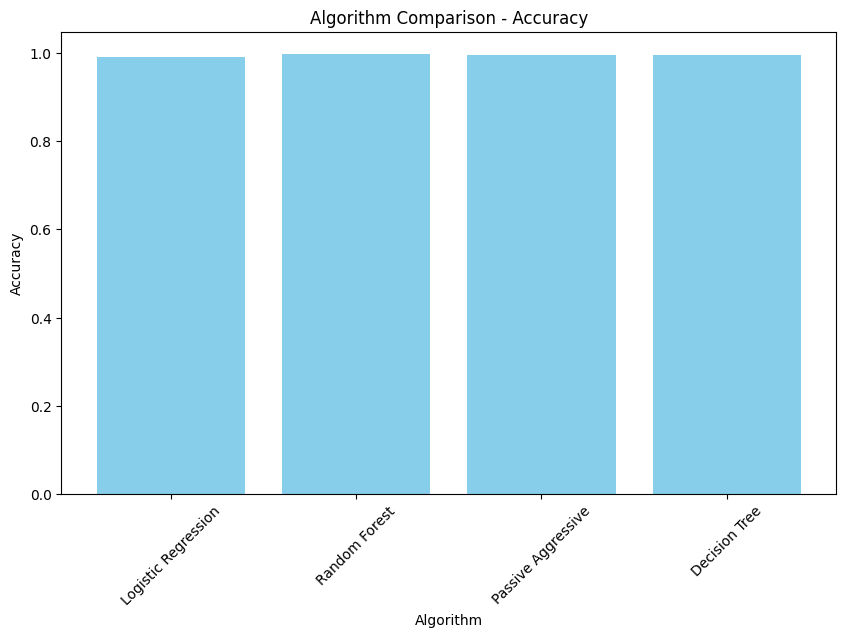

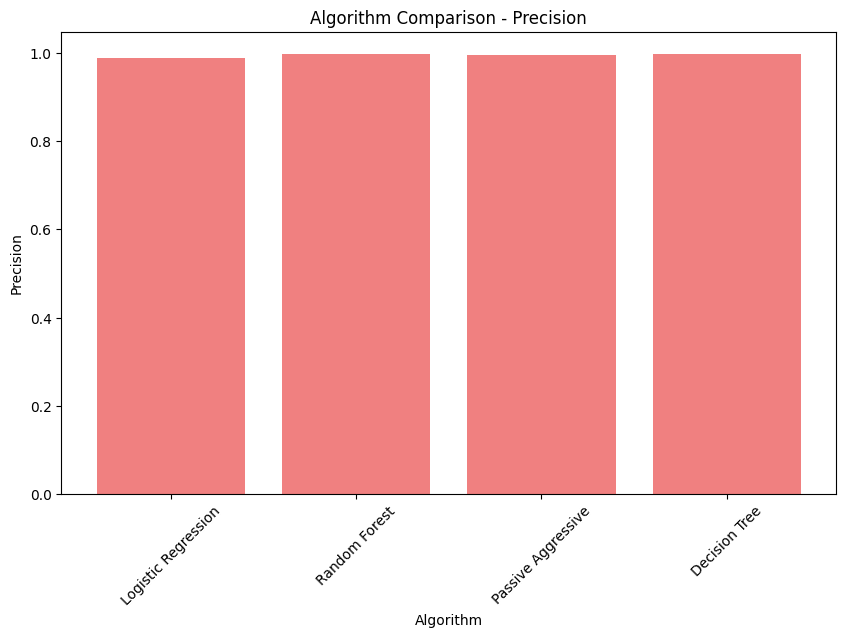

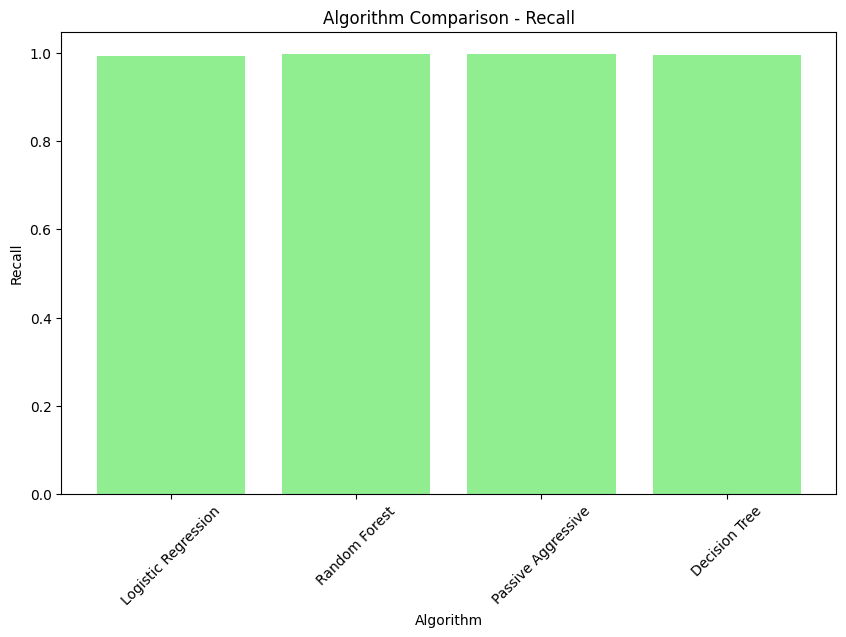

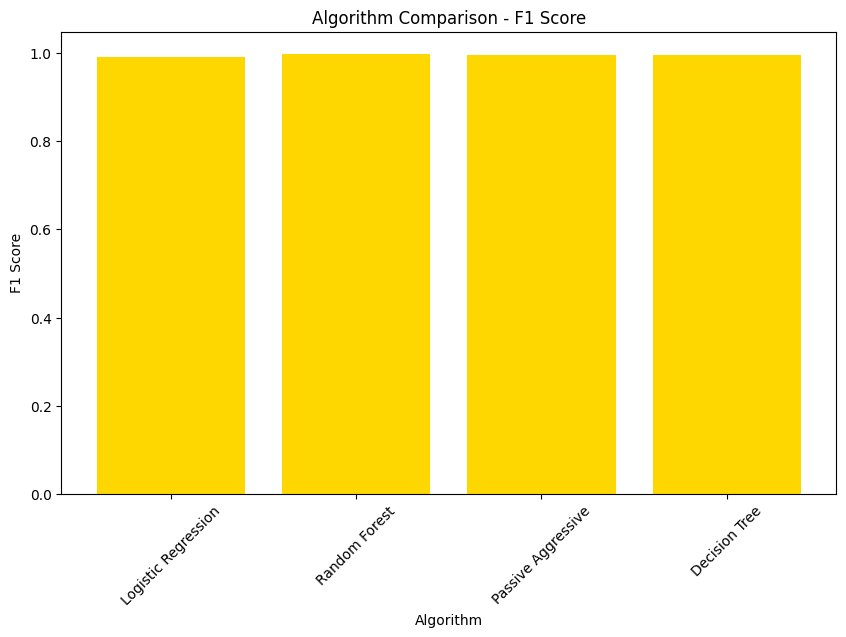

In [ ]:
import matplotlib.pyplot as plt

# Define the algorithm names and their corresponding metrics
algorithms = ['Logistic Regression', 'Random Forest', 'Passive Aggressive', 'Decision Tree']
accuracies = [lr_accuracy, rf_accuracy, pa_accuracy, dt_accuracy]
precisions = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recalls = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for precision
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precisions, color='lightcoral')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Algorithm Comparison - Precision')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for recall
plt.figure(figsize=(10, 6))
plt.bar(algorithms, recalls, color='lightgreen')
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Algorithm Comparison - Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for F1 score
plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_scores, color='gold')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('Algorithm Comparison - F1 Score')
plt.xticks(rotation=45)
plt.show()


Comparing Machine Learning Models for Fake News Detection

This visualization compares the performance of various models based on four evaluation metrics:
- **Accuracy**: Overall correctness of the model.
- **Precision**: Ability to correctly identify "True" labels.
- **Recall**: Ability to detect all "True" labels.
- **F1 Score**: A balance between precision and recall.

The models compared:
- **Logistic Regression**
- **Random Forest**
- **Passive Aggressive Classifier**
- **Decision Tree**

Each bar represents the model's performance across all metrics, aiding in selecting the most effective approach.


<Figure size 1200x800 with 0 Axes>

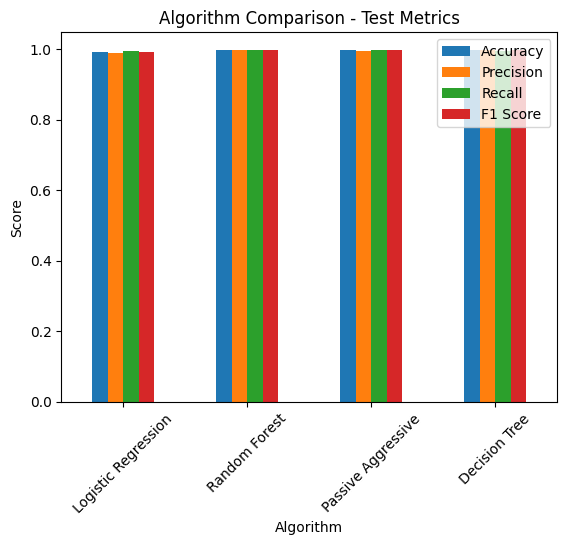

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the algorithm names and their corresponding metrics
algorithms = ['Logistic Regression', 'Random Forest', 'Passive Aggressive', 'Decision Tree']
accuracy_scores = [lr_accuracy, rf_accuracy, pa_accuracy, dt_accuracy]
precision_scores = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recall_scores = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the algorithm column as the index for plotting
results_df.set_index('Algorithm', inplace=True)

# Create a bar chart for all metrics
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', stacked=False)
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm Comparison - Test Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

MODEL VALIDATION

News Prediction

**Predicting Fake News Based on Title**
This function predicts whether a given news title is **fake** or **real** using a Naive Bayes model.

**Steps:**
1. **Preprocessing**:
   - Converts text to lowercase.
   - Tokenizes the words.
   - Removes stopwords.
   
2. **TF-IDF Transformation**:
   - Converts the preprocessed text into numerical features.

3. **Prediction**:
   - Uses a trained Naive Bayes model to classify the title.

**Example Predictions:**
- `"Donald Trump Sends Out Embarrassing New Year"` → **Fake/Real**
- `"As U.S. budget fight looms, Republicans flip their fiscal script"` → **Fake/Real**

This allows quick validation of news titles for misinformation detection.


In [ ]:
import nltk
from nltk.corpus import stopwords

# Define a function for predicting titles
def predict_title(title_text):
    # Preprocess the title
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]

    # Convert the preprocessed text into TF-IDF vectors
    tfidf_vector = tfidf_vectorizer.transform([" ".join(preprocessed_title_text)])

    # Make the prediction
    prediction = naive_bayes_model.predict(tfidf_vector)

    return prediction

# Example titles
title_text_1 = "Donald Trump Sends Out Embarrassing New Year"
title_text_2 = "As U.S. budget fight looms, Republicans flip their fiscal script"

# Predict and display results for both titles
prediction_1 = predict_title(title_text_1)
prediction_2 = predict_title(title_text_2)

if prediction_1 == 1:
    print("Title 1: The news is likely true.")
else:
    print("Title 1: The news is likely fake.")

if prediction_2 == 1:
    print("Title 2: The news is likely true.")
else:
    print("Title 2: The news is likely fake.")

Title 1: The news is likely fake.
Title 2: The news is likely true.
